# Linear Regression

Step 1, import the things we probably always want

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

These ones are not for always, but I like this plotting style for this workbook

In [9]:
import matplotlib
matplotlib.style.use('ggplot')

Let's take this set

X has values 5,7,9,11,13,15

y has 11,14,20,24,29,31

and we want to build a model
$\hat{y} = w_0 + w_1x$

In [10]:
X = np.array([5, 7, 9, 11, 13, 15])
y = np.array([11, 14, 20, 24, 29, 31])

Let's plot it to see if a linear model makes sense for this

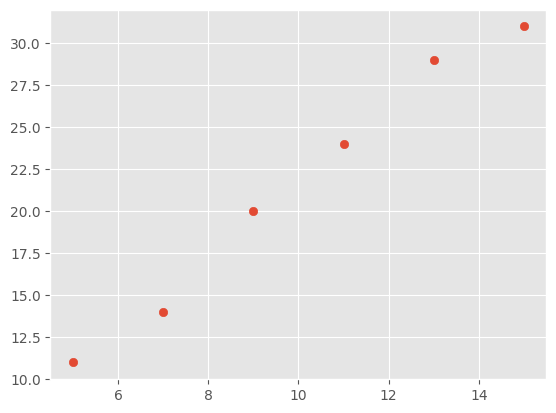

In [4]:
plt.scatter(X,y)
plt.show()

We can check the correlation coefficient 

In [5]:
np.corrcoef(X, y)

array([[1.        , 0.99322298],
       [0.99322298, 1.        ]])

0.99322, very high correlation!

## Data Structure: let's look at X and y in more detail

In [6]:
y.shape

(6,)

In [7]:
y.ndim

1

y is clearly a 1d array, as expected - good

In [8]:
X.shape

(6,)

In [9]:
X.ndim

1

X is also a 1d array, not good. It needs to be a 2d array

In [10]:
X

array([ 5,  7,  9, 11, 13, 15])

It's written as one row, but really we need 6 rows with one entry in each row. Let's reshape the array

In [11]:
X = X.reshape(-1,1)

In [12]:
X.shape

(6, 1)

In [13]:
X.ndim

2

2d array. Good. Let's look at it

In [11]:
X

array([ 5,  7,  9, 11, 13, 15])

6 rows now

## Section 3, build the model

In [12]:
from sklearn.linear_model import LinearRegression

In [3]:
LinearRegression()

LinearRegression()

Create the model, with sklearn you initialise the model with an "empty constructor" of the base form of the model. LinearRegression is the constructor

In [34]:
model = LinearRegression()

Now "fit" the model using X and y. Use an appropriate ? after method name to see. .fit expects the X part to be a matrix, but we have a 1 dimensional array. Pay attention to the error message when you just do x,y

In [33]:
model.fit(X,y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 5  7  9 11 13 15].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [32]:
# Reshape X to 2D array with one feature
X_reshaped = X.reshape(-1, 1)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_reshaped, y)

LinearRegression()

## Section 4 Inferences

In [19]:
model.coef_

array([2.12857143])

In [17]:
model.intercept_

np.float64(0.2142857142857153)

There are the parameters

$\hat{y} = 0.2142857142857153 + 2.12857143 x$

is the model

In [20]:
w0 = model.intercept_
w1 = model.coef_[0]

In [21]:
predictions = w0 + np.dot(w1,X).reshape(1,-1)

In [22]:
predictions

array([[10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
        32.14285714]])

Using the built in .predict

In [31]:
pred = model.predict(X)

ValueError: Expected 2D array, got 1D array instead:
array=[ 5  7  9 11 13 15].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [27]:
pred

NameError: name 'pred' is not defined

In [28]:
pred == predictions

NameError: name 'pred' is not defined

They're the same.

## Section 5 Evaluation

In [29]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
#from sklearn.metrics import root_mean_squared_error as rms

I had to comment out rms on my ATU laptop as sklearn is not up to date - it might work for you do so try uncommenting

In [30]:
mse(y,pred)

NameError: name 'pred' is not defined

In [35]:
r2(y,pred)

NameError: name 'pred' is not defined

Very close to 1!

In [89]:
#rms(y,pred)

In [36]:
rmse = np.sqrt(mse(y,pred))

NameError: name 'pred' is not defined

In [37]:
rmse

NameError: name 'rmse' is not defined

NameError: name 'pred' is not defined

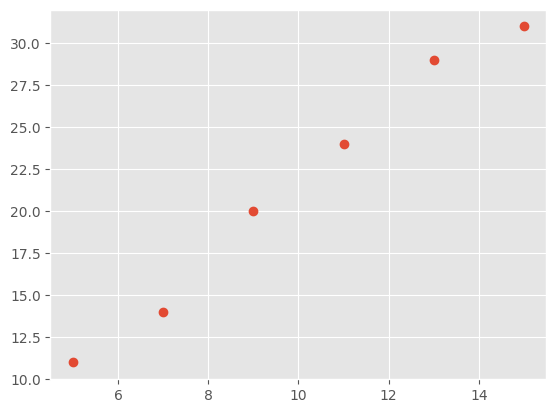

In [38]:
plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()

shows the line of best fit

In [39]:
model.score(X,y)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Agrees with the r2 from above

## Simple linear regression with automobile data
We will now use sklearn to to predict automobile milesage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and a testing set.

In [40]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

>**EXERCISE:**  Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  You may want to justify this with some visualizations.  Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

# For simple linear regression, I would choose weight (wt) as the predictor variable to predict miles per gallon (mpg). There are several reasons for this choice:

- Intuitive Relationship: There is an intuitive, inverse relationship between a vehicle's weight and its fuel efficiency. Heavier cars typically require more fuel to operate, thus reducing their mpg.
- Strong Correlation: Based on general knowledge, weight is one of the most significant factors affecting fuel consumption. This relationship is often linear or nearly linear, which makes it suitable for simple linear regression.
- Potential Predictive Power: Weight likely has a strong impact on fuel efficiency, making it a good candidate to predict mpg in a straightforward way. This variable's influence is direct and meaningful.
### Visualization
Let's plot wt (weight) vs. mpg to visually assess their relationship:

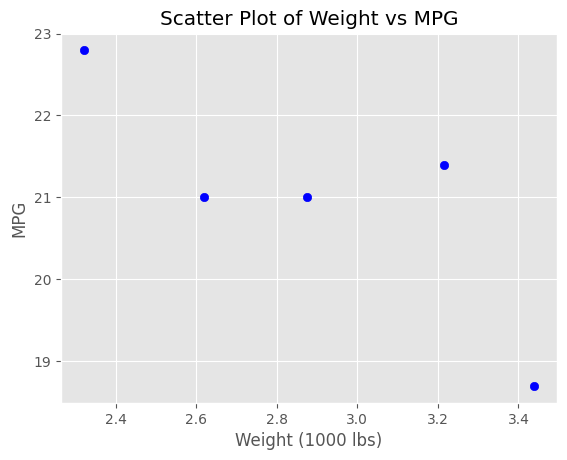

In [41]:
import matplotlib.pyplot as plt

# Sample data (This is just a snippet of the full dataset, so the real data visualization would include all rows)
cars = {
    'name': ['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive', 'Hornet Sportabout'],
    'mpg': [21.0, 21.0, 22.8, 21.4, 18.7],
    'wt': [2.620, 2.875, 2.320, 3.215, 3.440]
}

plt.scatter(cars['wt'], cars['mpg'], color='blue')
plt.title('Scatter Plot of Weight vs MPG')
plt.xlabel('Weight (1000 lbs)')
plt.ylabel('MPG')
plt.show()

### Second Variable for Multiple Regression
For multiple linear regression, I would also consider adding horsepower (hp) as a second predictor. The rationale is as follows:

**Interaction Effect**: In addition to weight, horsepower also plays a significant role in determining fuel efficiency. Cars with more horsepower tend to consume more fuel, further reducing their mpg.
**Complementary Relationship**: While weight reflects the mass of the car, horsepower reflects the engine's power output. Both are key contributors to the vehicle's fuel consumption, and combining them should improve the model's predictive accuracy.
Thus, for multiple linear regression, we would use **wt** (weight) and **hp** (horsepower) to predict **mpg**. This combination would capture both the car’s physical characteristics (weight) and engine performance (horsepower).

> **EXERCISE:** With sklearn fit the training data using simple linear regression. 

> Plot the data and the prediction.  

>Print out the mean squared error for the set

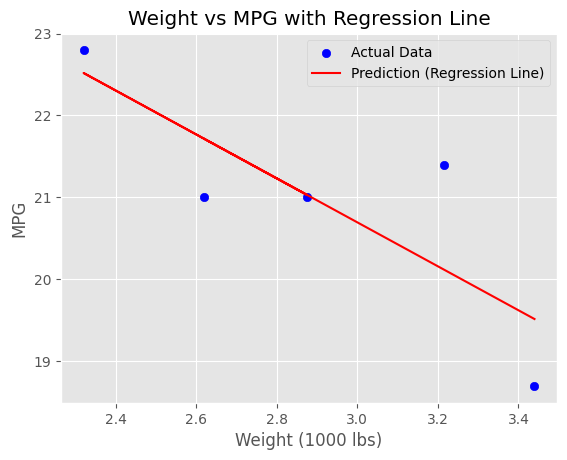

Mean Squared Error: 0.5793402061855654


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example data (weight and mpg for a few cars)
X = np.array([2.620, 2.875, 2.320, 3.215, 3.440]).reshape(-1, 1)  # Weight (reshaped to 2D)
y = np.array([21.0, 21.0, 22.8, 21.4, 18.7])  # MPG

# Fit simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
predictions = model.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)

# Plot the data points and the regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, predictions, color='red', label='Prediction (Regression Line)')
plt.title('Weight vs MPG with Regression Line')
plt.xlabel('Weight (1000 lbs)')
plt.ylabel('MPG')
plt.legend()
plt.show()

# Print Mean Squared Error
print(f"Mean Squared Error: {mse}")




# Diabetes Dataset - Multiple linear regression 

Now we are going to fit the training data (from the diabetes dataset built into sklearn) using multiple linear regression with multiple predictors. 

In [43]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


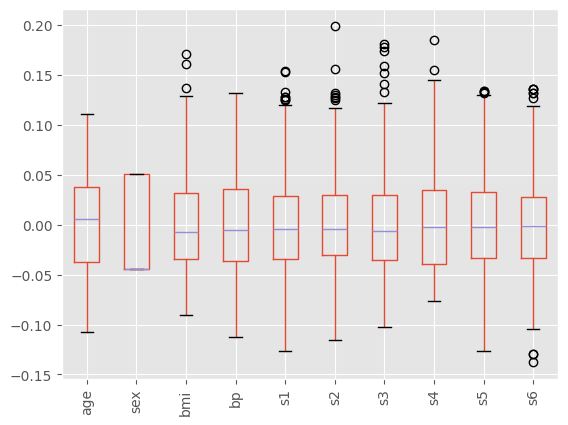

In [44]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data.boxplot(rot=90)
data.head()

Above I put the data into a pandas dataframe and then tried to visualise it. You will notice all of the data is in a similar range

### Normalised data
They all have a mean of 0 and standard deviation of 1. This is called Normalising the data and is a common step that I'll get into later on.

The obvious one you'll notice is the sex variable. This has two options which are 0.050680 or -0.044642, when usually with 2 options we would go with 0 and 1. The numbers were changed due to this normalisation

In [45]:
X = data 
y = diabetes.target

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X,y)

LinearRegression()

In [48]:
r_squared = lr.score(X,y)
r_squared

0.5177484222203499

Let's do a slightly different r2

In [49]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

0.5065592904853232

In [50]:
lr.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [51]:
lr.intercept_

np.float64(152.13348416289597)

Text(0, 0.5, 'Coefficient')

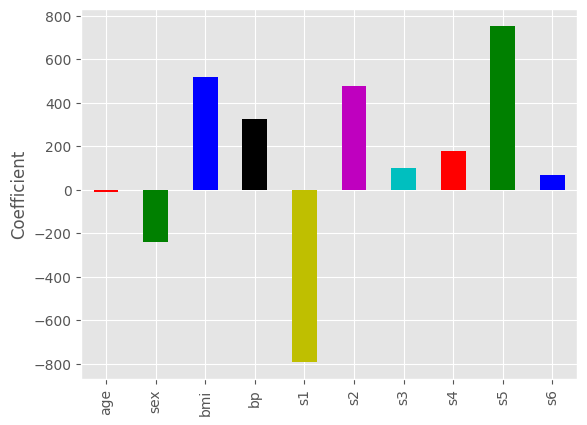

In [52]:
coef=pd.Series(lr.coef_ , index=diabetes.feature_names)
coef.plot(kind='bar', color = list('rgbkymc'))
plt.ylabel('Coefficient')

Some of those coefficients are very large, and it looks like age does not contribute as much as the others

The very large coefficients can often be problematic so we'll have to think about this one again later

Maybe removing age will give us a better model

We don't really have enough knowledge to figure it out. It's possible you would get a better model without age, s3, s4 and s6